### Preparasi Google Colab dan Kaggle

In [ ]:
# Mount google drive to access necessary files and google colab functions.

from google.colab import drive
drive.mount('/content/gdrive')

# changing the working directory
%cd /content/gdrive/My Drive/Project PCD P2/

Mounted at /content/gdrive
/content/gdrive/My Drive/Project PCD P2


In [ ]:
# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
# uploaded = files.upload()
# kaggle.json already exists in Project PCD P2.
# Only if that one fails then you reupload.

In [ ]:
# Read kaggle.json in your google drive project folder

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Project PCD P2"
# /content/gdrive/My Drive/PCD P2 Kamis is the path where kaggle.json is present in the Google Drive

### Get Data Using API

In [ ]:
# API command to search datasets
!kaggle datasets list -s crowww/meat-quality-assessment-based-on-deep-learning

ref                                                    title                              size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------  -----  -------------------  -------------  
crowww/meat-quality-assessment-based-on-deep-learning  Meat Quality Assessment Dataset   270MB  2021-04-06 11:47:16            363  


In [ ]:
# API command to download
!kaggle datasets download -d crowww/meat-quality-assessment-based-on-deep-learning

 99% 268M/270M [00:02<00:00, 76.6MB/s]
100% 270M/270M [00:02<00:00, 95.6MB/s]


In [ ]:
# unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  meat-quality-assessment-based-on-deep-learning.zip
  inflating: Fresh/test_20171016_104321D.jpg  
  inflating: Fresh/test_20171016_104521D.jpg  
  inflating: Fresh/test_20171016_104721D.jpg  
  inflating: Fresh/test_20171016_104921D.jpg  
  inflating: Fresh/test_20171016_105121D.jpg  
  inflating: Fresh/test_20171016_105321D.jpg  
  inflating: Fresh/test_20171016_105521D.jpg  
  inflating: Fresh/test_20171016_105721D.jpg  
  inflating: Fresh/test_20171016_105921D.jpg  
  inflating: Fresh/test_20171016_110121D.jpg  
  inflating: Fresh/test_20171016_110321D.jpg  
  inflating: Fresh/test_20171016_110521D.jpg  
  inflating: Fresh/test_20171016_110721D.jpg  
  inflating: Fresh/test_20171016_110921D.jpg  
  inflating: Fresh/test_20171016_111121D.jpg  
  inflating: Fresh/test_20171016_111321D.jpg  
  inflating: Fresh/test_20171016_111521D.jpg  
  inflating: Fresh/test_20171016_111721D.jpg  
  inflating: Fresh/test_20171016_111921D.jpg  
  inflating: Fresh/test_20171016_112121D.jpg  

## MAIN PROGRAM (CNN Classification + Image Resizing)

### Read Data and Preparation

In [ ]:
# Import Packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [ ]:
# Initialize parameters for preprocessing image
# Specifically, for resizing.
# sample_size is how many images from each class will be preprocessed.
# width is the after-resized image width.
# height is the after-resized image height.

sample_size = 948 # Each class have exactly 948 data. We'll use them all.
width = 100
height = 100

In [ ]:
# Import Path to navigate to folder address in google drive easily.

from pathlib import Path

In [ ]:
# Navigate to dataset folder path.
# Print the path to make sure it's been read correctly.

Data_Path = Path("/content/gdrive/My Drive/Project PCD P2/")
print(Data_Path)

/content/gdrive/My Drive/Project PCD P2


In [ ]:
# Read all file that ends in .jpg
# Which is, all image files in the dataset folder.

JPG_Path = list(Data_Path.glob(r"*/*.jpg"))
print(JPG_Path)

# Notice that images of the same class are gathered in the same folder with the exact same class name, as seen here.

[PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_104321D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_115321D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_121521D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_113521D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_110321D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_121321D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_110921D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_112121D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_113921D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_112721D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fresh/test_20171016_105921D.jpg'), PosixPath('/content/gdrive/My Drive/Project PCD P2/Fr

In [ ]:
# Read images based on their labels on their respective folder name.
# All images in "Fresh" folder is labeled Fresh.
# All images in "Spoiled" folder is labeled Spoiled. 

files = ['Fresh', 'Spoiled']
# adress = '/kaggle/input/meat-quality-assessment-based-on-deep-learning/{}'
adress = '/content/gdrive/My Drive/Project PCD P2/{}'
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

In [ ]:
# Print the head.
# The image files have been read successfully into their respective labels.

pd.DataFrame(data).head()

,Fresh,Spoiled
0,test_20171016_104321D.jpg,test_20171017_213121D.jpg
1,test_20171016_115321D.jpg,test_20171017_203921D.jpg
2,test_20171016_121521D.jpg,test_20171017_203121D.jpg
3,test_20171016_113521D.jpg,test_20171017_201121D.jpg
4,test_20171016_110321D.jpg,test_20171017_215921D.jpg


### Explore Data

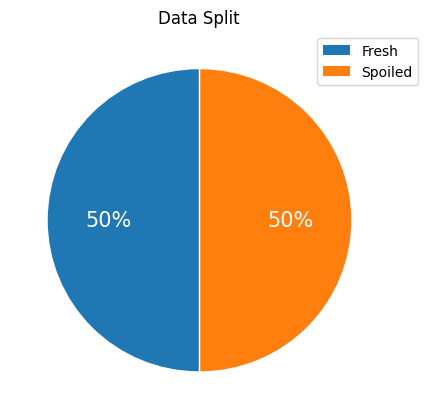

In [ ]:
# Image distribution or Data split.
# How many images are from each class, in percentage?

sizes = [len(data['Fresh']), len(data['Spoiled'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

### Resize Images

In [ ]:
# For each image class:
# Use cv2 to read images. 
# Convert the images from BGR color scheme to RGB.
# Resize the image according to the width and height parameters.
# Ends the loop process after the specified number (sample_size) of images have been resized.

# Calculate the time it took to finish the entire process and print it.

start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Spoiled
Calculate Time 862.77752


In [ ]:
# Convert the images into np.array data.
# Print the image shape to make sure it's correct.

image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

# Ada 1896 data, dengan ukuran width x height = 100px x 100px, dan memiliki 3 channel.

(1896, 100, 100, 3)

### Visualize Data

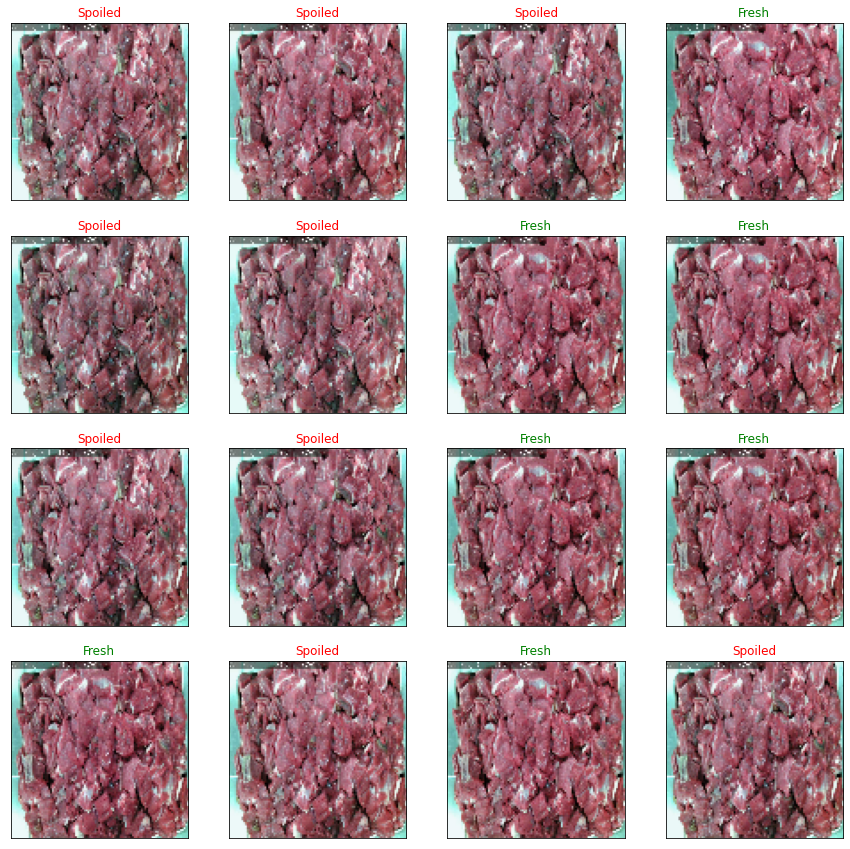

In [ ]:
# Visualize data.
# Plot the images according to it's class.
# Give the label a green color if the image is from the "Fresh" class.
# Give the label a red color otherwise.

plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

### CNN Classification

In [ ]:
# Import necessary libraries

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [ ]:
# Use label encoder to extract the labels of images.

labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [ ]:
# Separate the image from the label.
# Split the data into 70% train and 30% test, with random_state = 123.

X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [ ]:
# Print the train and test shape to make sure it's correctly splitted.

print("train_images.shape")
print(train_images.shape)
print("\ntest_images.shape")
print(test_images.shape)

# Ada 1327 data train dan 569 data test.

train_images.shape
(1327, 100, 100, 3)

test_images.shape
(569, 100, 100, 3)


In [ ]:
# Create the learning model.

model = models.Sequential()
# Add a Convolution 2D layer with "relu" as the activation function.
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
# Add a Pooling layer, specifically a MaxPooling2D layer.
model.add(layers.MaxPooling2D((2, 2)))
# Add a Convolution 2D layer with "relu" as the activation function.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Add a Pooling layer, specifically a MaxPooling2D layer.
model.add(layers.MaxPooling2D((2, 2)))
# Add a Convolution 2D layer with "relu" as the activation function.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Add a flatten layer.
model.add(layers.Flatten())
# Add a dense layer with relu as the activation function.
model.add(layers.Dense(64, activation='relu'))
# Add a dense layer.
model.add(layers.Dense(2))

In [ ]:
# Train the model.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
42/42 [==============================] - 24s 549ms/step - loss: 0.3397 - accuracy: 0.8666 - val_loss: 0.0719 - val_accuracy: 0.9561
Epoch 2/10
42/42 [==============================] - 23s 547ms/step - loss: 0.0835 - accuracy: 0.9616 - val_loss: 0.0904 - val_accuracy: 0.9578
Epoch 3/10
42/42 [==============================] - 23s 548ms/step - loss: 0.0469 - accuracy: 0.9842 - val_loss: 0.0309 - val_accuracy: 0.9930
Epoch 4/10
42/42 [==============================] - 23s 549ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0324 - val_accuracy: 0.9824
Epoch 5/10
42/42 [==============================] - 23s 547ms/step - loss: 0.0189 - accuracy: 0.9947 - val_loss: 0.0202 - val_accuracy: 0.9912
Epoch 6/10
42/42 [==============================] - 23s 548ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0132 - val_accuracy: 0.9982
Epoch 7/10
42/42 [==============================] - 23s 548ms/step - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.1448 - val_accuracy: 0.9473

### Evaluasi Model

18/18 - 2s - loss: 0.0064 - accuracy: 0.9982


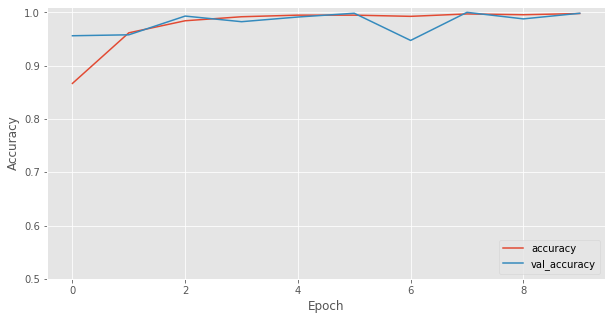

In [ ]:
# Evaluate the model.
# Plot the accuracy and val_accuracy of the trained model.

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

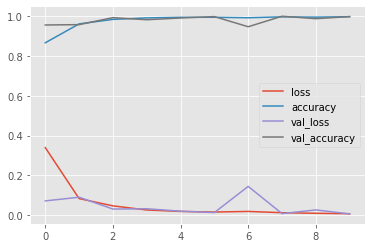

In [ ]:
# Plot the full summary of the model.

Dict_Summary = pd.DataFrame(history.history)
Dict_Summary.plot()

In [ ]:
# Evaluate the model with the test data.

result=model.evaluate(test_images, test_labels)

18/18 [==============================] - 2s 126ms/step - loss: 0.0064 - accuracy: 0.9982


In [ ]:
# Print the model's metrics result

for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.006430730223655701
accuracy : 0.9982425570487976


In [ ]:
# Print the model summary.
# This is all the layers we have created and used in the model.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 35)        980       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 35)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        20224     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

### Prediction

In [ ]:
# Import the necessary libraries.

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

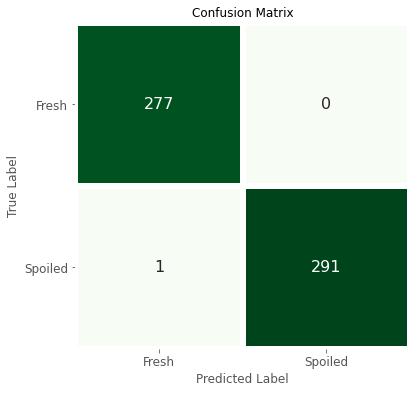

In [ ]:
# Predict the model with the test images.

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

# Make a confusion matrix using the test label and prediction function.

cm = confusion_matrix(test_labels,toClass(y_pred))

# Plot the confusion matrix.

df1 = pd.DataFrame(columns=["Fresh","Spoiled"], index= ["Fresh","Spoiled"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
# Create a classification_report
# Print it

Class_Report = classification_report(test_labels,toClass(y_pred))
print(Class_Report)

# 0 adalah Fresh. 1 Adalah spoiled

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       292

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



In [ ]:
# Create a prediction function.

def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

### Checking Prediction

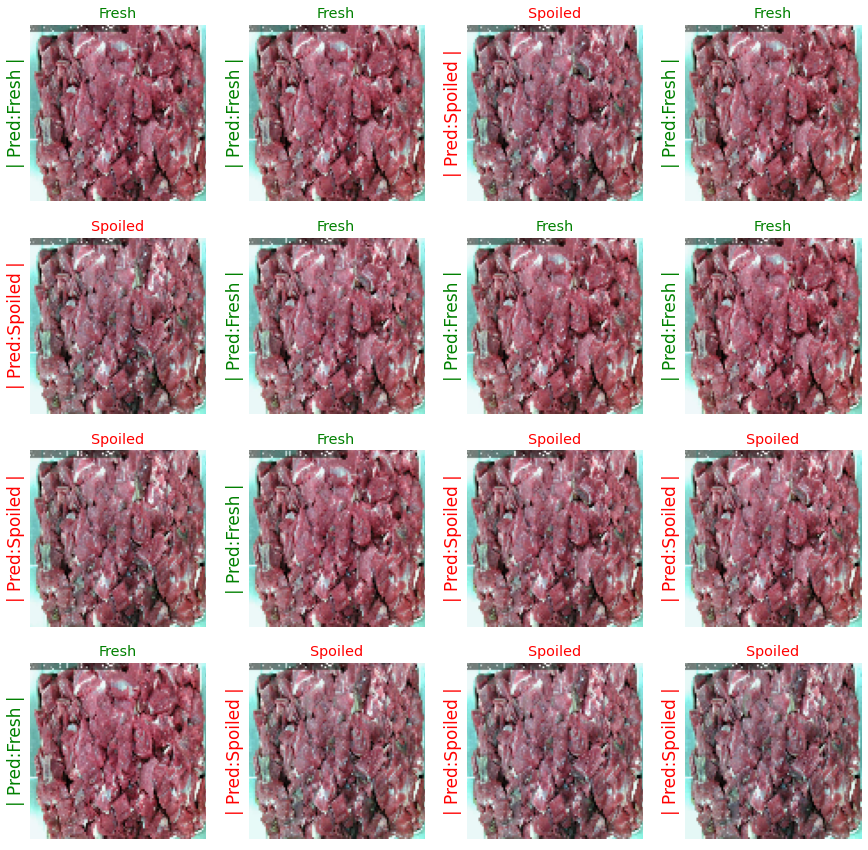

In [ ]:
# Use the prediction function to make predictions.
# Plot the prediction results.

plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

## Referensi dan Daftar Pustaka

[Evaluate Model, Confusion Matrix, Classification Report](https://www.kaggle.com/msafi04/meatquality-assessment-99-acc-prevent-overfit)

[CNN Model and Resizing Images](https://www.kaggle.com/nalkrolu/meat-quality-assessment)

[Test Cases/Checking Predictions](https://www.kaggle.com/omkarjc27/meat-quality-assesment-98-acc)

[Path Process and How to Read Data](https://www.kaggle.com/brsdincer/meat-quality-prediction-full-explanation)